
# Что такое последовательная зависимость? #

В предыдущих уроках мы исследовали свойства временных рядов, которые проще всего моделировать как *зависимые от времени* свойства, то есть с признаками, которые можно получить напрямую из временного индекса. Однако некоторые свойства временных рядов можно моделировать только как *последовательно зависимые* свойства, то есть используя в качестве признаков прошлые значения целевого ряда. Структура таких рядов может быть неочевидна на графике во времени; но если построить зависимость от прошлых значений, структура становится ясной — как на рисунке ниже.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/X0sSnwp.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Эти два ряда имеют последовательную зависимость, но не зависимость от времени. Точки справа имеют координаты <code>(значение в момент t-1, значение в момент t)</code>.
</center></figcaption>
</figure>

При тренде и сезонности мы обучали модели подгонять кривые к графикам, как слева на рисунке выше — модели обучались зависимости от времени. Цель этого урока — обучить модели подгонять кривые к графикам, как справа — чтобы они обучались последовательной зависимости.

### Циклы

Один из особенно распространенных способов проявления последовательной зависимости — это **циклы**. Циклы — это паттерны роста и спада во временном ряду, связанные с тем, как значение ряда в один момент зависит от значений в предыдущие моменты, но не обязательно от самого шага времени. Циклическое поведение характерно для систем, которые могут влиять на себя или чьи реакции сохраняются во времени. Экономики, эпидемии, популяции животных, извержения вулканов и похожие природные явления часто демонстрируют цикличность.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/CC3TkAf.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Четыре временных ряда с циклическим поведением.
</center></figcaption>
</figure>

Отличие циклов от сезонности в том, что циклы не обязательно зависят от времени так, как зависят сезоны. В цикле важна не столько конкретная дата, сколько то, что происходило в недавнем прошлом. Относительная независимость от времени означает, что циклическое поведение может быть гораздо более нерегулярным, чем сезонность.

# Лагированные ряды и лаговые графики #

Чтобы исследовать возможную последовательную зависимость (например, циклы) во временном ряду, нужно создать «лагированные» копии ряда. **Лагирование** временного ряда означает сдвиг его значений вперед на один или несколько шагов времени, или эквивалентно — сдвиг времен в его индексе назад на один или несколько шагов. В обоих случаях эффект один и тот же: наблюдения в лагированном ряду выглядят так, как будто они произошли позже во времени.

Ниже показан месячный уровень безработицы в США (`y`) вместе с его первым и вторым лагированными рядами (`y_lag_1` и `y_lag_2`). Обратите внимание, как значения лагированных рядов сдвинуты вперед во времени.

In [1]:

import pandas as pd

# Federal Reserve dataset: https://www.kaggle.com/federalreserve/interest-rates
reserve = pd.read_csv(
    "../dataset/reserve.csv",
    parse_dates={'Date': ['Year', 'Month', 'Day']},
    index_col='Date',
)

y = reserve.loc[:, 'Unemployment Rate'].dropna().to_period('M')
df = pd.DataFrame({
    'y': y,
    'y_lag_1': y.shift(1),
    'y_lag_2': y.shift(2),    
})

df.head()

/var/folders/7k/q1n29k35429d2mnrn_3mbtjr0000gn/T/ipykernel_21359/3860892176.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  reserve = pd.read_csv(


,y,y_lag_1,y_lag_2
Date,,,
1954-07,5.8,NaN,NaN
1954-08,6.0,5.8,NaN
1954-09,6.1,6.0,5.8
1954-10,5.7,6.1,6.0
1954-11,5.3,5.7,6.1


Лагируя временной ряд, мы можем сделать его прошлые значения видимыми одновременно со значениями, которые мы пытаемся предсказать (то есть в той же строке). Это делает лагированные ряды полезными признаками для моделирования последовательной зависимости. Чтобы прогнозировать ряд уровня безработицы в США, мы могли бы использовать `y_lag_1` и `y_lag_2` как признаки для предсказания цели `y`. Это позволило бы прогнозировать будущий уровень безработицы как функцию уровня безработицы в предыдущие два месяца.

### Лаговые графики

**Лаговый график** временного ряда показывает его значения, отложенные против его лагов. Последовательная зависимость во временном ряду часто становится заметной при взгляде на лаговый график. На этом лаговом графике *US Unemployment* видно сильную и, по‑видимому, линейную связь между текущим уровнем безработицы и прошлым.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Hvrboya.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Лаговый график US Unemployment с отмеченными автокорреляциями.
</center></figcaption>
</figure>

Самая распространенная мера последовательной зависимости называется **автокорреляцией** — это просто корреляция временного ряда с одним из его лагов. У *US Unemployment* автокорреляция равна 0.99 на лаге 1, 0.98 на лаге 2 и так далее.

### Выбор лагов

При выборе лагов для использования в качестве признаков обычно не имеет смысла включать *каждый* лаг с большой автокорреляцией. В *US Unemployment*, например, автокорреляция на лаге 2 может быть полностью обусловлена «затухающей» информацией от лага 1 — то есть корреляцией, перешедшей с предыдущего шага. Если лаг 2 не содержит ничего нового, нет причин включать его, если уже есть лаг 1.

**Частичная автокорреляция** показывает корреляцию лага с учетом всех предыдущих лагов — то есть сколько «новой» корреляции добавляет этот лаг. Построение графика частичной автокорреляции помогает выбрать, какие лаговые признаки использовать. На рисунке ниже лаги 1–6 лежат вне интервалов «отсутствия корреляции» (синим), поэтому мы могли бы выбрать лаги 1–6 как признаки для *US Unemployment*. (Лаг 11, вероятно, ложноположительный.)

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/6nTe94E.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Частичные автокорреляции US Unemployment до лага 12 с 95% доверительными интервалами отсутствия корреляции.
</center></figcaption>
</figure>

График вроде приведенного выше называется *коррелограммой*. Для лаговых признаков коррелограмма — это то же самое, что периодограмма для признаков Фурье.

Наконец, нужно помнить, что автокорреляция и частичная автокорреляция измеряют *линейную* зависимость. Поскольку в реальных временных рядах часто есть существенные нелинейные зависимости, при выборе лаговых признаков лучше смотреть на лаговый график (или использовать более общую меру зависимости, например [mutual information](https://www.kaggle.com/ryanholbrook/mutual-information)). В ряду *Sunspots* есть лаги с нелинейной зависимостью, которые мы могли бы пропустить, ориентируясь только на автокорреляцию.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Q38UVOu.png" width=350, alt="">
    <figcaption style="textalign: center; font-style: italic"><center>Лаговый график ряда <em>Sunspots</em>.
</center></figcaption>
</figure>

Такие нелинейные связи можно либо преобразовать к линейному виду, либо выучить с помощью подходящего алгоритма.

# Пример — Flu Trends #

Датасет *Flu Trends* содержит записи о визитах к врачу из‑за гриппа по неделям в период с 2009 по 2016 год. Наша цель — прогнозировать число случаев гриппа на ближайшие недели.

Мы рассмотрим два подхода. В первом мы будем прогнозировать число визитов к врачу, используя лаговые признаки. Во втором — прогнозировать визиты, используя лаги *другого* набора временных рядов: поисковых запросов, связанных с гриппом, как их измеряет Google Trends.

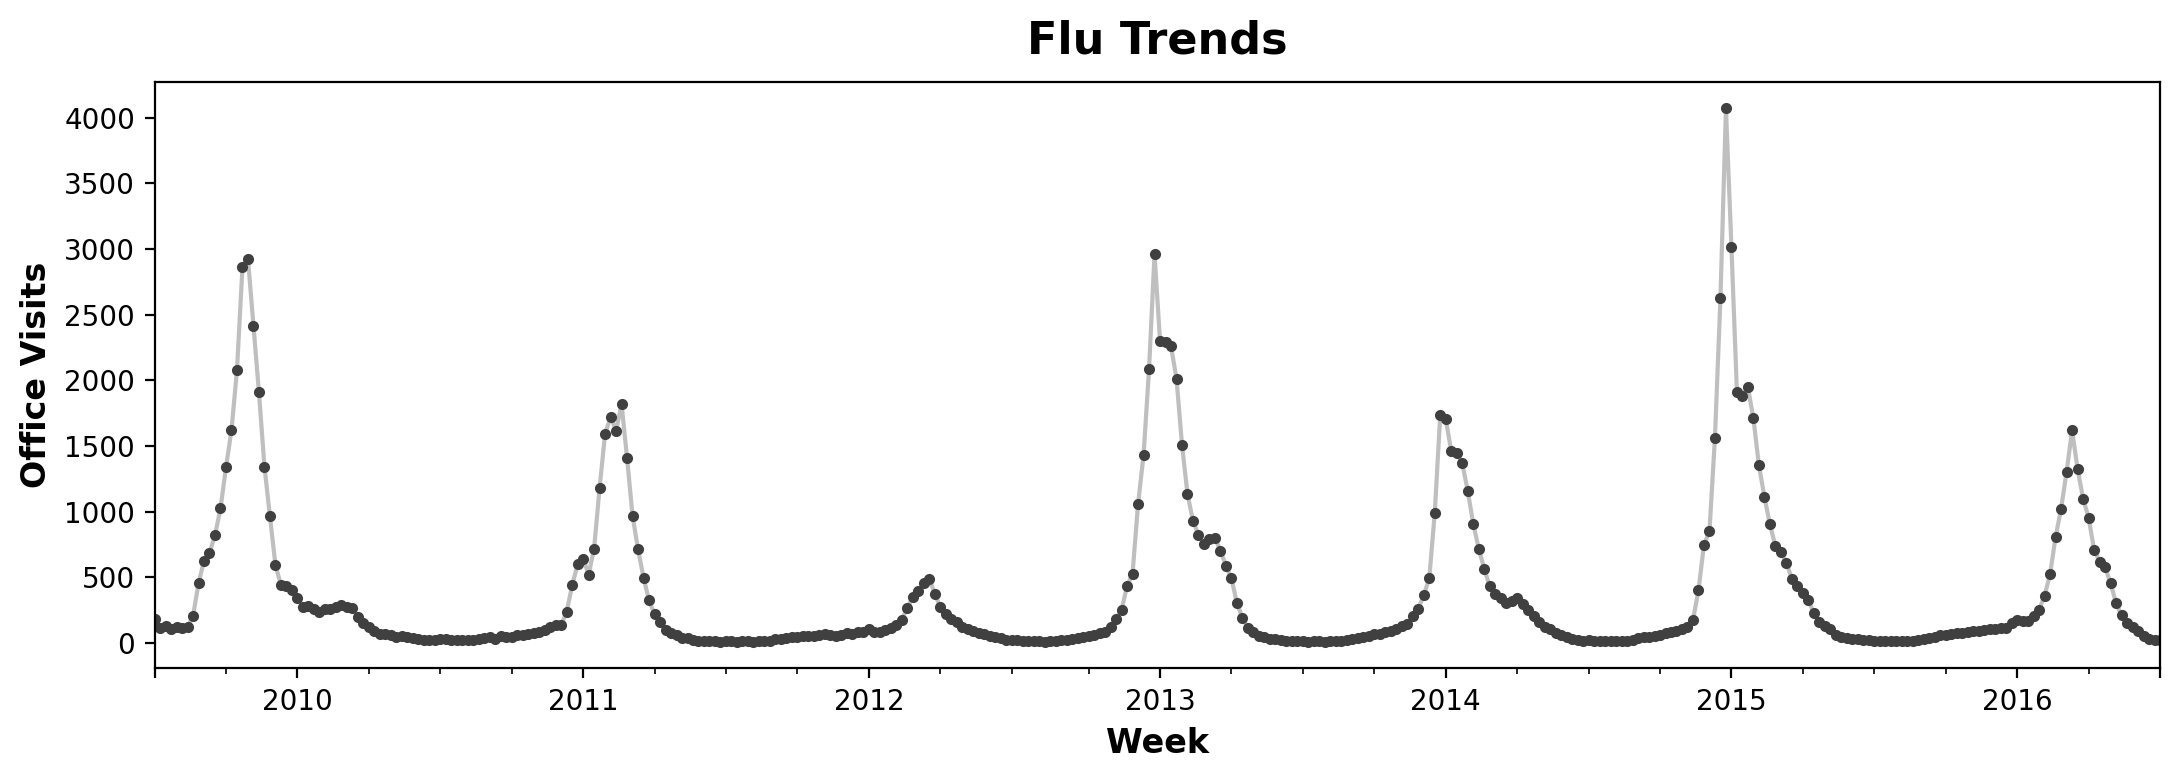

In [2]:

from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


data_dir = Path("../dataset/")
flu_trends = pd.read_csv(data_dir / "flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

Наши данные *Flu Trends* показывают нерегулярные циклы вместо регулярной сезонности: пик обычно приходится на новый год, но иногда раньше или позже, иногда больше или меньше. Моделирование этих циклов с помощью лаговых признаков позволит нашему прогнозировщику динамически реагировать на меняющиеся условия, а не быть привязанным к точным датам и временам, как это происходит с сезонными признаками.

Сначала посмотрим на лаговые и автокорреляционные графики:

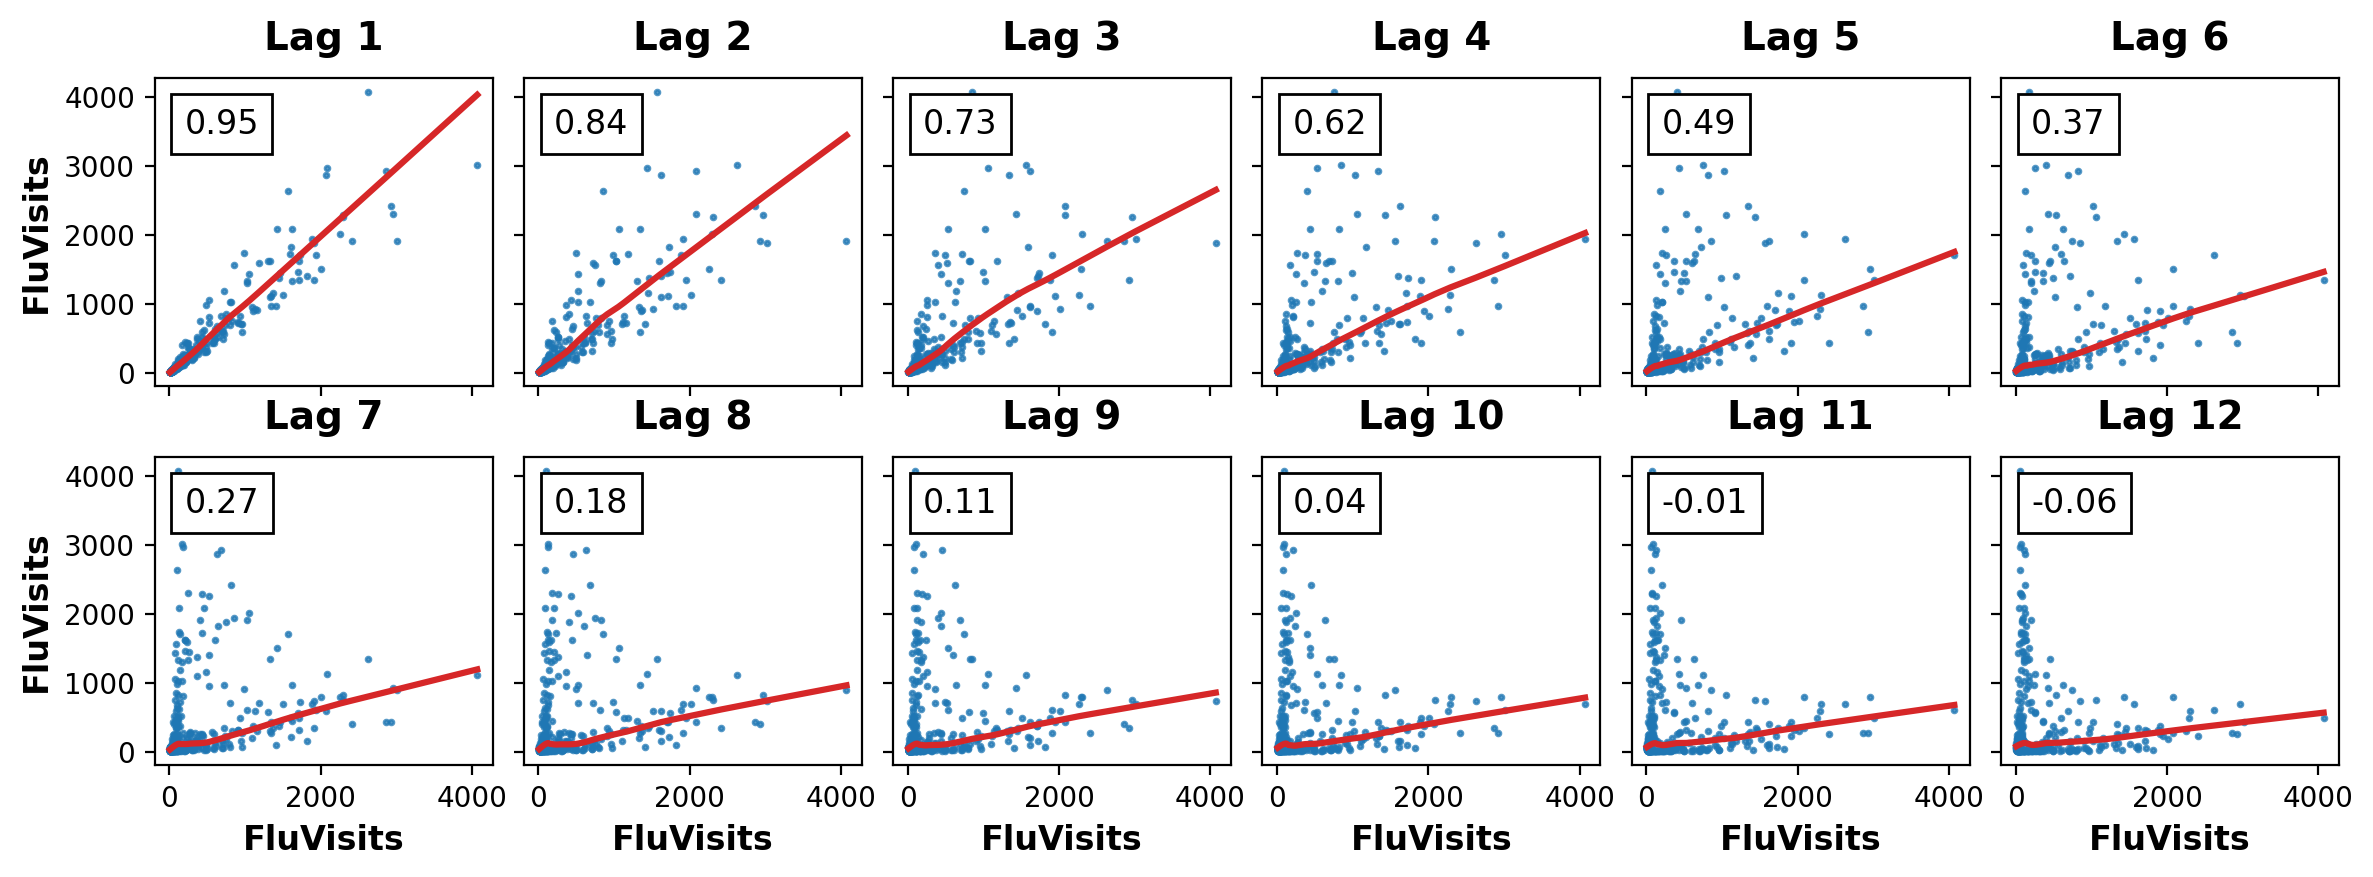

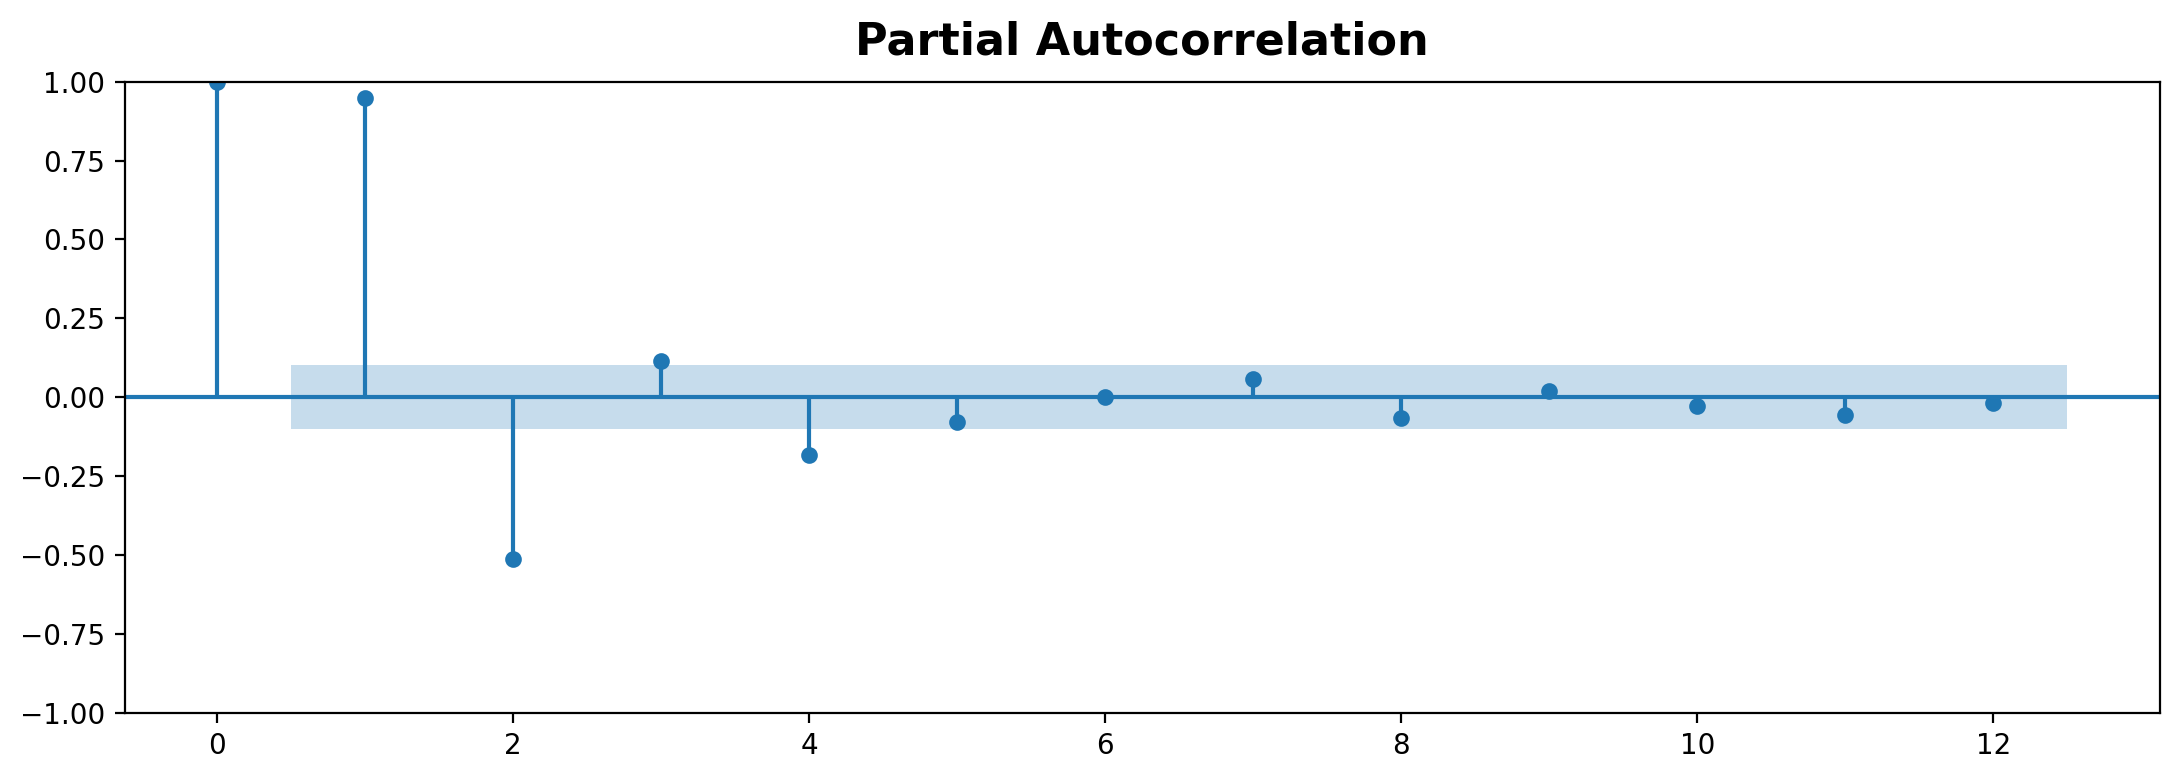

In [4]:
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
_ = plot_pacf(flu_trends.FluVisits, lags=12)

Лаговые графики показывают, что связь `FluVisits` с его лагами в основном линейная, а частичные автокорреляции подсказывают, что зависимость можно уловить лагами 1, 2, 3 и 4. Лагировать временной ряд в Pandas можно методом `shift`. Для этой задачи мы заполним отсутствующие значения, появляющиеся после лагирования, значением `0.0`.

In [6]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(flu_trends.FluVisits, lags=4)
X = X.fillna(0.0)

В предыдущих уроках мы могли строить прогнозы на сколько угодно шагов за пределами обучающих данных. Однако при использовании лаговых признаков мы ограничены прогнозированием тех шагов времени, для которых доступны лагированные значения. Используя лаг 1 в понедельник, мы не можем сделать прогноз на среду, потому что нужное значение лага 1 — это вторник, который еще не наступил.

Стратегии решения этой проблемы мы увидим в уроке 6. В этом примере мы просто будем использовать значения из тестового набора.

In [9]:

# Create target series and data splits
y = flu_trends.FluVisits.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

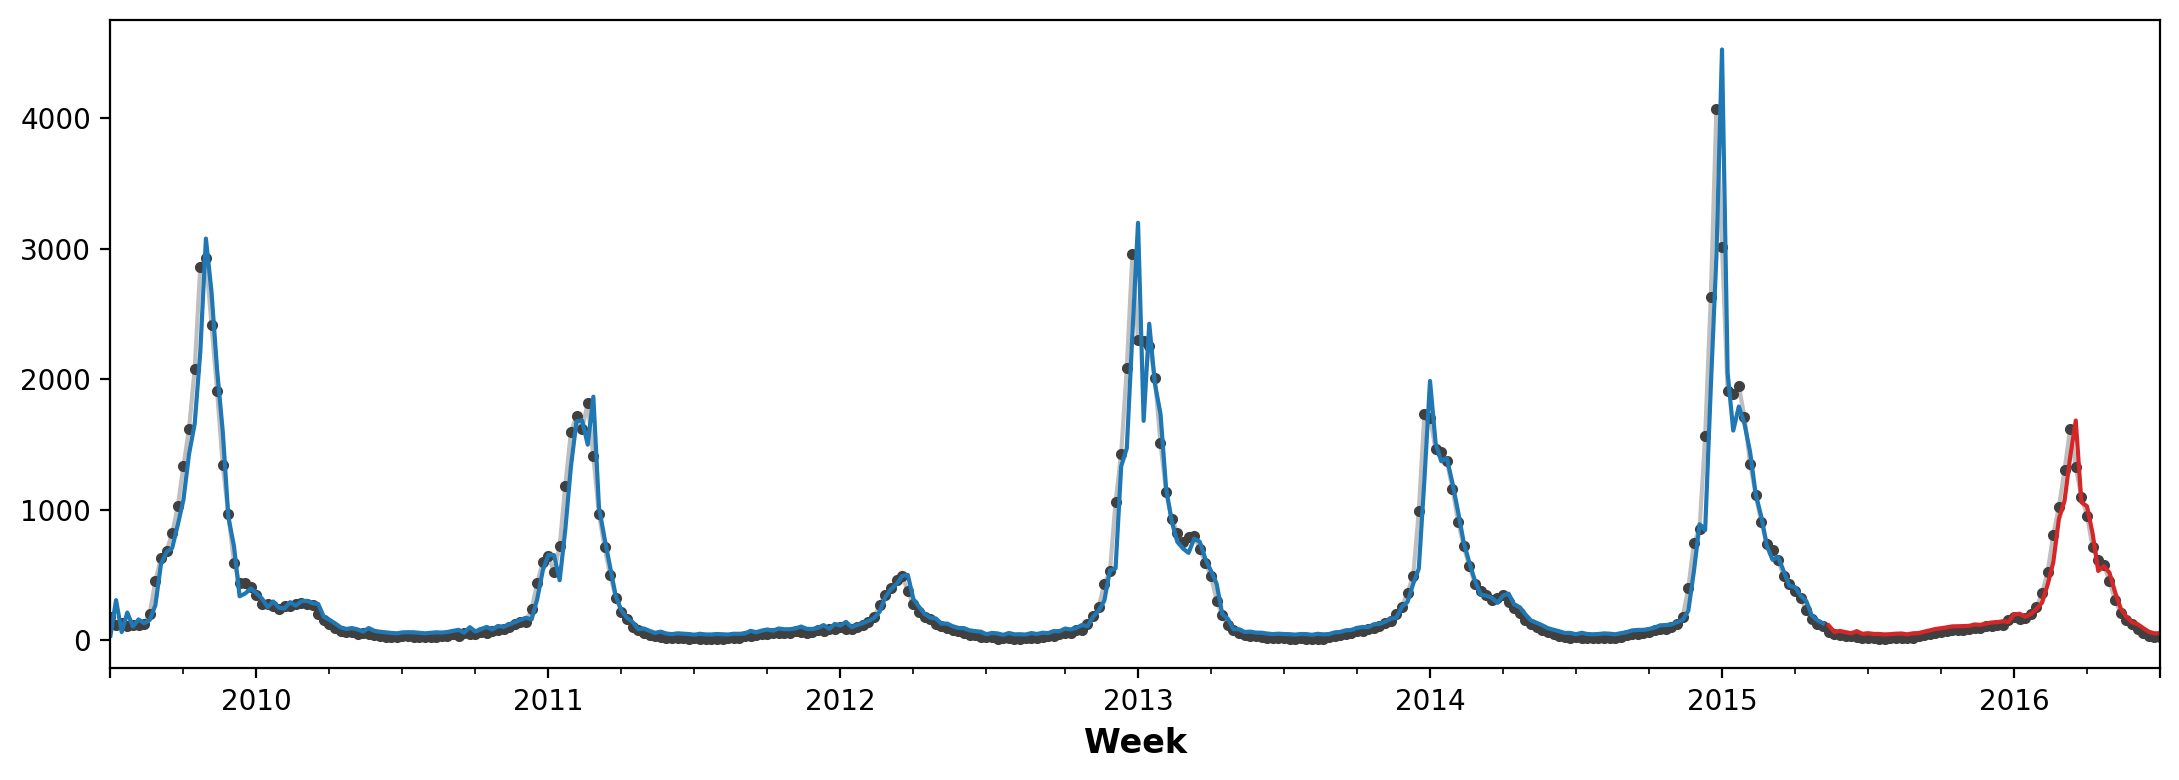

In [10]:

ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

---

Если смотреть только на прогнозные значения, видно, что нашей модели нужен один шаг времени, чтобы отреагировать на резкие изменения целевого ряда. Это распространенное ограничение моделей, использующих только лаги целевого ряда как признаки.

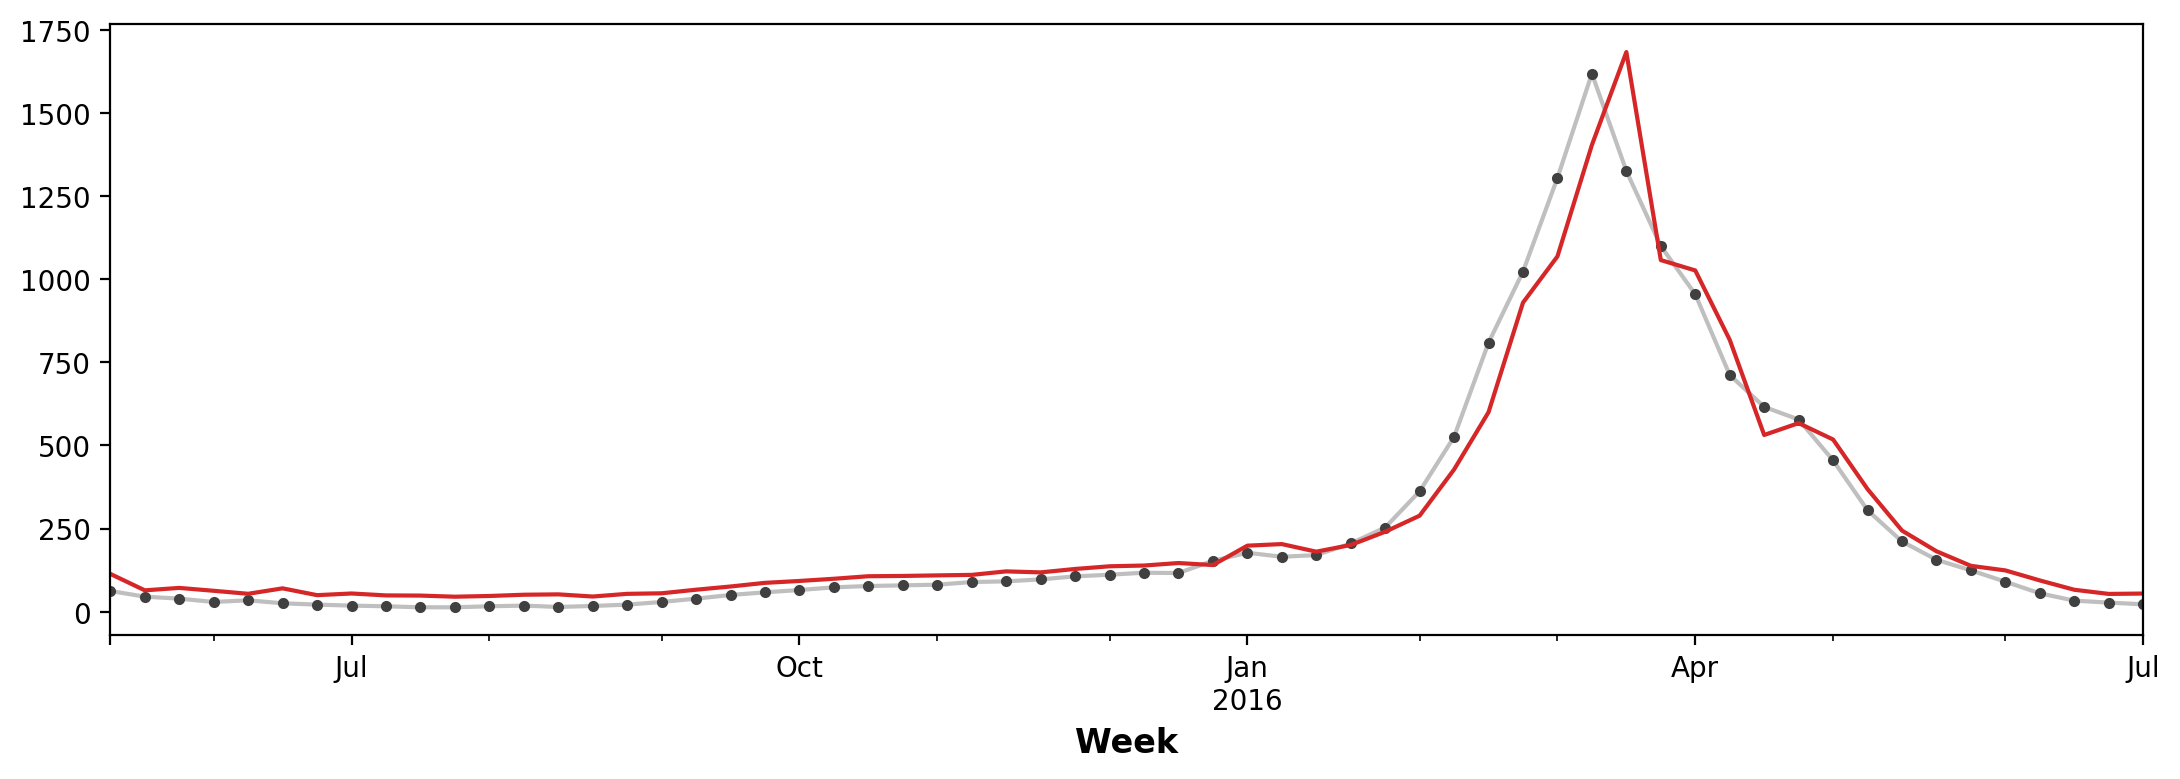

In [11]:

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

Чтобы улучшить прогноз, мы могли бы попытаться найти *опережающие индикаторы* — временные ряды, которые могут дать «раннее предупреждение» об изменениях в случаях гриппа. Поэтому во втором подходе мы добавим к обучающим данным популярность некоторых запросов, связанных с гриппом, измеренную Google Trends.

Построение графика поисковой фразы `'FluCough'` против целевой `'FluVisits'` подсказывает, что такие запросы могут быть полезными опережающими индикаторами: связанные с гриппом запросы обычно становятся популярными за несколько недель до визитов к врачу.

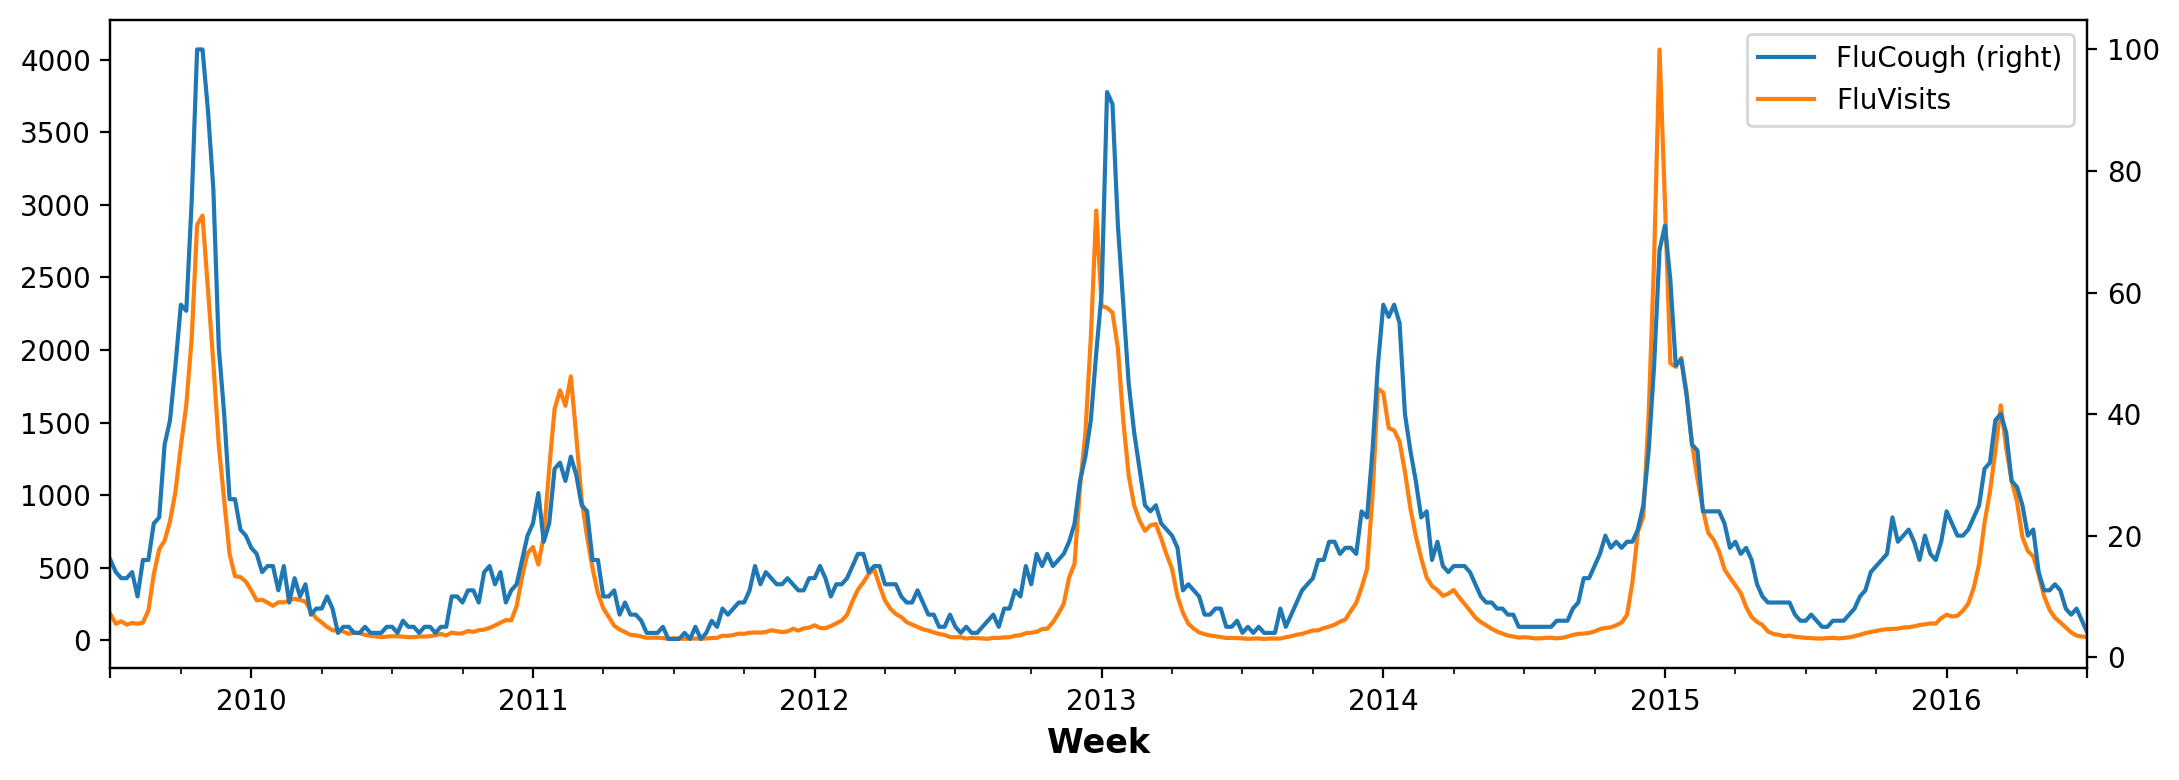

In [12]:

ax = flu_trends.plot(
    y=["FluCough", "FluVisits"],
    secondary_y="FluCough",
)

В датасете есть 129 таких терминов, но мы будем использовать лишь несколько.

In [13]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

# Create three lags for each search term
X0 = make_lags(flu_trends[search_terms], lags=3)
X0.columns = [' '.join(col).strip() for col in X0.columns.values]

# Create four lags for the target, as before
X1 = make_lags(flu_trends['FluVisits'], lags=4)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

Наши прогнозы получились немного более грубыми, но модель, похоже, лучше умеет предвосхищать резкие росты числа визитов из‑за гриппа, что позволяет предположить, что несколько временных рядов популярности запросов действительно эффективны как опережающие индикаторы.

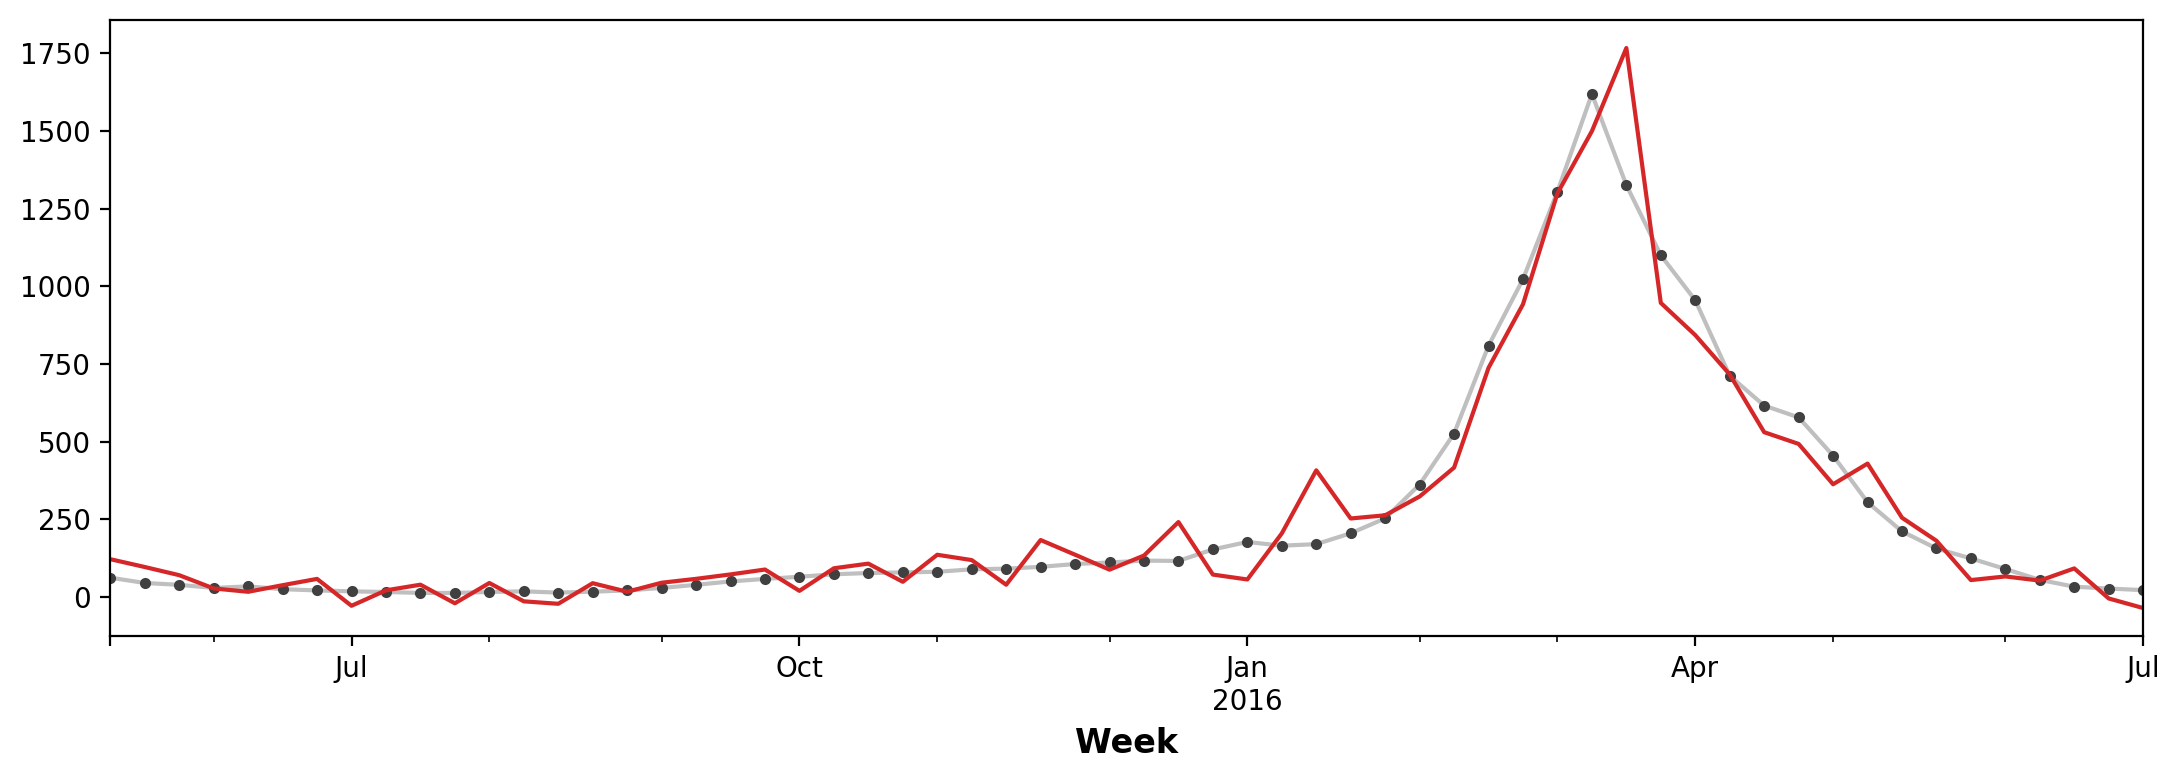

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

---

Временные ряды, показанные в этом уроке, можно назвать «чисто циклическими»: у них нет очевидного тренда или сезонности. Но довольно часто временной ряд содержит и тренд, и сезонность, и циклы — все три компонента одновременно. Такой ряд можно моделировать линейной регрессией, просто добавив соответствующие признаки для каждого компонента. Можно даже объединять модели, обученные на отдельных компонентах, — мы научимся этому в следующем уроке на *гибридных прогнозировщиках*.

# Ваш ход #

[**Создайте лаговые признаки для Store Sales**](https://www.kaggle.com/kernels/fork/19616002) и изучите другие виды признаков временных рядов.

---




*Есть вопросы или комментарии? Посетите [форум обсуждений курса](https://www.kaggle.com/learn/time-series/discussion), чтобы пообщаться с другими учащимися.*